In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot 

In [2]:
# Loading the dataset 

data = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Exploration

In [5]:
# Display the dimensions and info of the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**NOTE:** So 14 input features exist, along with 1 target feature(income).
 
Among them, age is continous and race/sex etc are categorical

# Exploring Age

In [7]:
age = data['age']
age

0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64

<Axes: ylabel='Frequency'>

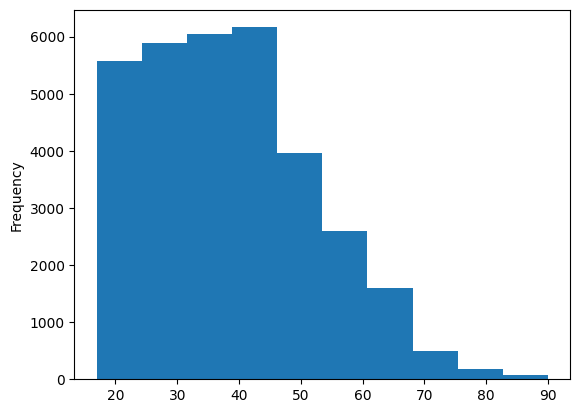

In [14]:
age.plot(kind = 'hist')

We can see that most of the population is 20-50.
 
The ages are centered around 40, and are skewed right.

Lets further explore this with kdeplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

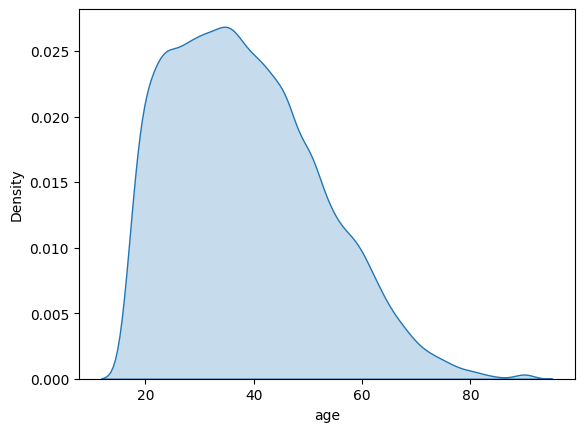

In [16]:
# Kernel density estimate plot

sns.kdeplot(data['age'], fill = True)

Now we can clearly see the distribution, and it is exactly as we predicted.

Lets use boxplot to get further insights

<Axes: >

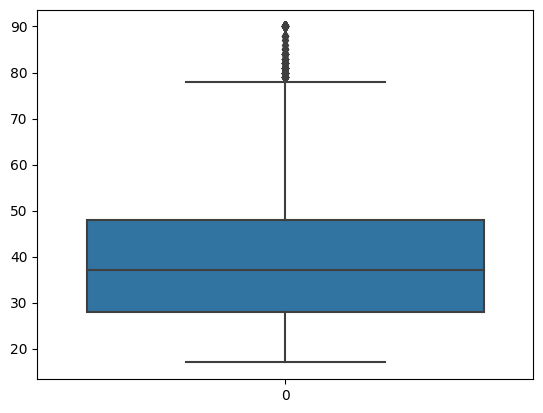

In [18]:
sns.boxplot(data['age'])

We can see that median is just below 40, Q1 is near 30 and Q3 is near 50. Plot whiskers are around 10 and 80.

And the points far away from 80, are rare anomalies/outliers.

# Exploring Gender

In [19]:
sex = data['sex']
sex

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
32556      Male
32557    Female
32558      Male
32559    Female
32560      Male
Name: sex, Length: 32561, dtype: object

In [21]:
sex.isna().sum() #seemingly no NaN values

0

In [22]:
sex.value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

Lets analyze the population genderwise.

<Axes: xlabel='sex'>

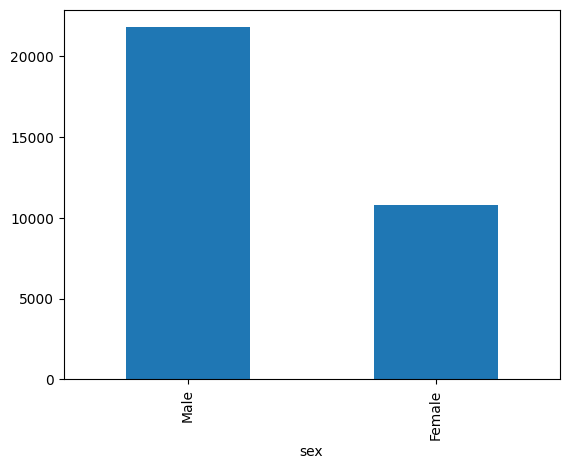

In [25]:
sex.value_counts().plot(kind = 'bar')

So most of population is male above 20000, and female count is around 10000

<Axes: xlabel='sex', ylabel='count'>

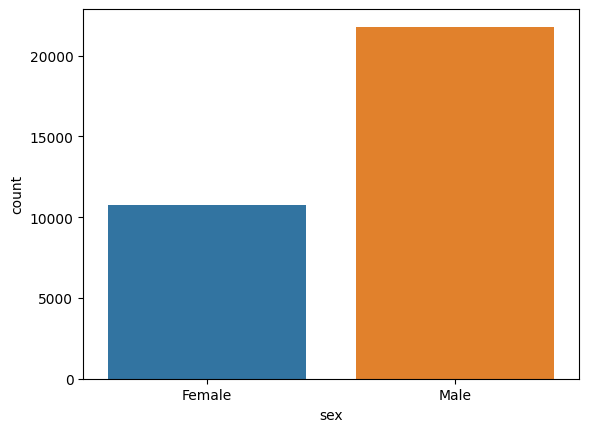

In [27]:
sns.countplot(x = 'sex', data=data)

The same chart, but more visually clear.

Now lets explore further by combining both age and gender

# Exploring combination of both

In [28]:
male_data = data[data['sex'] == 'Male']
# Copy of dataset, but for only males

female_data = data[data['sex'] == 'Female']
# Copy of dataset, but for only females


<Axes: ylabel='Frequency'>

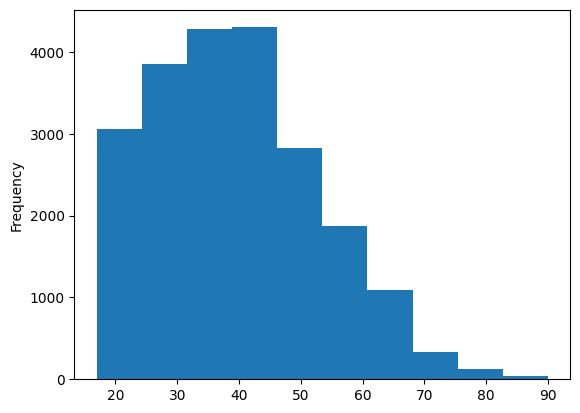

In [29]:
male_data['age'].plot(kind ='hist')

<Axes: ylabel='Frequency'>

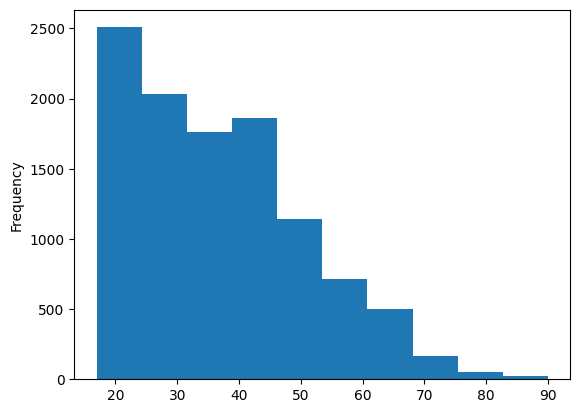

In [30]:
female_data['age'].plot(kind ='hist')

One can see the distribution of ages differ for both males and females. males are generally older, and females are generayy younger

But we can further compare them, with same scale of plots.

Lets make histplot of seaborn.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Count'>

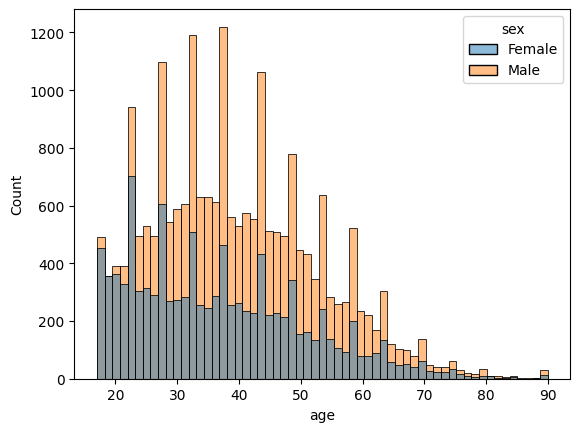

In [31]:
sns.histplot(x='age', hue='sex', data =data)

This confirms our analysis. Also note that age of males is around 40, and females is centered around 20-25. Female distribution is more skewed than males, whose distribution is more normal.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Density'>

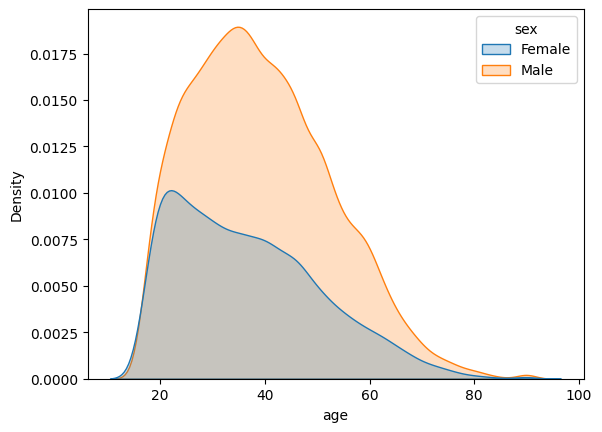

In [33]:
sns.kdeplot(x='age', hue ='sex', data=data, fill = True)

Kdeplot further confirms of analysis of skewness and distribution. 